# Import Library & Set paths.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

path = r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts'

# Importing Dataframes.

### Importing the unscaled dataframe, keeping only the temp min, mean, and max, dropping the three weather stations (GDANKS, ROMA, & TOURS)

In [2]:
unscaled_climate = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))
unscaled_climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [3]:
 unscaled_temps = unscaled_climate[['DATE', 'MONTH',
 'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()
unscaled_temps

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,11.4,21.4,18.2,12.1,24.4,11.7,7.9,...,12.0,0.6,-1.4,2.6,11.5,8.2,14.2,10.7,7.9,13.5
22946,20221028,10,16.7,14.3,21.9,15.9,10.6,21.2,11.7,7.9,...,11.7,2.3,0.6,4.0,12.5,11.0,14.3,10.7,7.9,13.5
22947,20221029,10,16.7,13.1,22.4,13.4,8.6,18.2,11.7,7.9,...,14.2,3.3,2.1,4.5,13.1,12.1,14.4,10.7,7.9,13.5
22948,20221030,10,15.4,11.6,21.1,15.0,9.1,20.9,11.7,7.9,...,8.1,3.4,2.7,4.1,7.5,5.1,12.4,10.7,7.9,13.5


In [4]:
unscaled_temps.to_csv(os.path.join(path, 'Data Brief + Data Sets', '1.4_unscaled_temps.csv'), index=False)

### Importing dataframe, scaling it, keeping only the temp min, mean, and max, dropping the three weather stations (GDANKS, ROMA, & TOURS)

In [26]:
scaled_climate = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))
scaled_climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [27]:
scaled_temps = scaled_climate[['DATE', 'MONTH',
 'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()
scaled_temps

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,11.4,21.4,18.2,12.1,24.4,11.7,7.9,...,12.0,0.6,-1.4,2.6,11.5,8.2,14.2,10.7,7.9,13.5
22946,20221028,10,16.7,14.3,21.9,15.9,10.6,21.2,11.7,7.9,...,11.7,2.3,0.6,4.0,12.5,11.0,14.3,10.7,7.9,13.5
22947,20221029,10,16.7,13.1,22.4,13.4,8.6,18.2,11.7,7.9,...,14.2,3.3,2.1,4.5,13.1,12.1,14.4,10.7,7.9,13.5
22948,20221030,10,15.4,11.6,21.1,15.0,9.1,20.9,11.7,7.9,...,8.1,3.4,2.7,4.1,7.5,5.1,12.4,10.7,7.9,13.5


In [28]:
scaler = StandardScaler()
columns = scaled_temps.columns

In [29]:
scaled_temps = pd.DataFrame(scaler.fit_transform(scaled_temps), columns = columns)
scaled_temps = scaled_temps.drop(['DATE','MONTH'], axis = 1)
scaled_temps = pd.concat([scaled_climate[['DATE','MONTH']],scaled_temps],axis=1)
scaled_temps

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,...,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,19600102,1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,...,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,19600103,1,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,...,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,19600104,1,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,...,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,19600105,1,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,...,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.747959,0.779123,0.724314,0.628750,0.463536,0.695687,-0.005167,-0.009517,...,0.183825,0.826301,0.846347,0.786149,0.517090,0.510778,0.382364,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.856604,1.223637,0.781585,0.367720,0.269258,0.376678,-0.005167,-0.009517,...,0.151430,1.074927,1.132678,0.991194,0.641496,0.884680,0.393353,-0.007287,-0.000520,-0.004530
22947,20221029,10,0.856604,1.039701,0.838855,0.083991,0.010220,0.077607,-0.005167,-0.009517,...,0.421385,1.221178,1.347425,1.064424,0.716139,1.031570,0.404341,-0.007287,-0.000520,-0.004530
22948,20221030,10,0.680055,0.809780,0.689952,0.265577,0.074979,0.346771,-0.005167,-0.009517,...,-0.237305,1.235803,1.433325,1.005840,0.019467,0.096816,0.184577,-0.007287,-0.000520,-0.004530


In [30]:
scaled_temps.to_csv(os.path.join(path, 'Data Brief + Data Sets', '1.4_scaled_temps.csv'))

### Importing the weather answer template.

In [31]:
pl_weather = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pl_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting Unscaled data into Test/Train.

In [32]:
X = unscaled_temps.drop(['DATE','MONTH'], axis = 1)
y = pl_weather.drop(['DATE'], axis = 1)

print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [35]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Testing the Unscaled data.

In [36]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

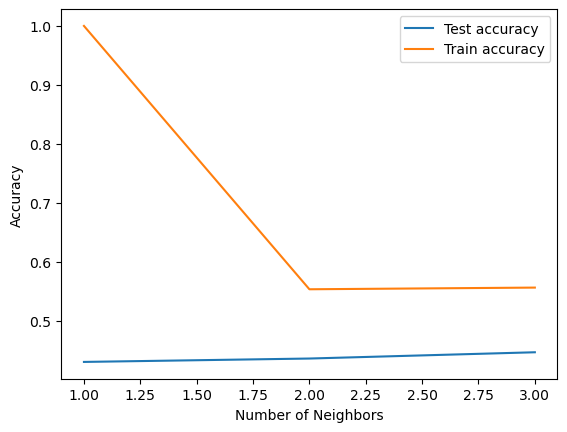

In [37]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


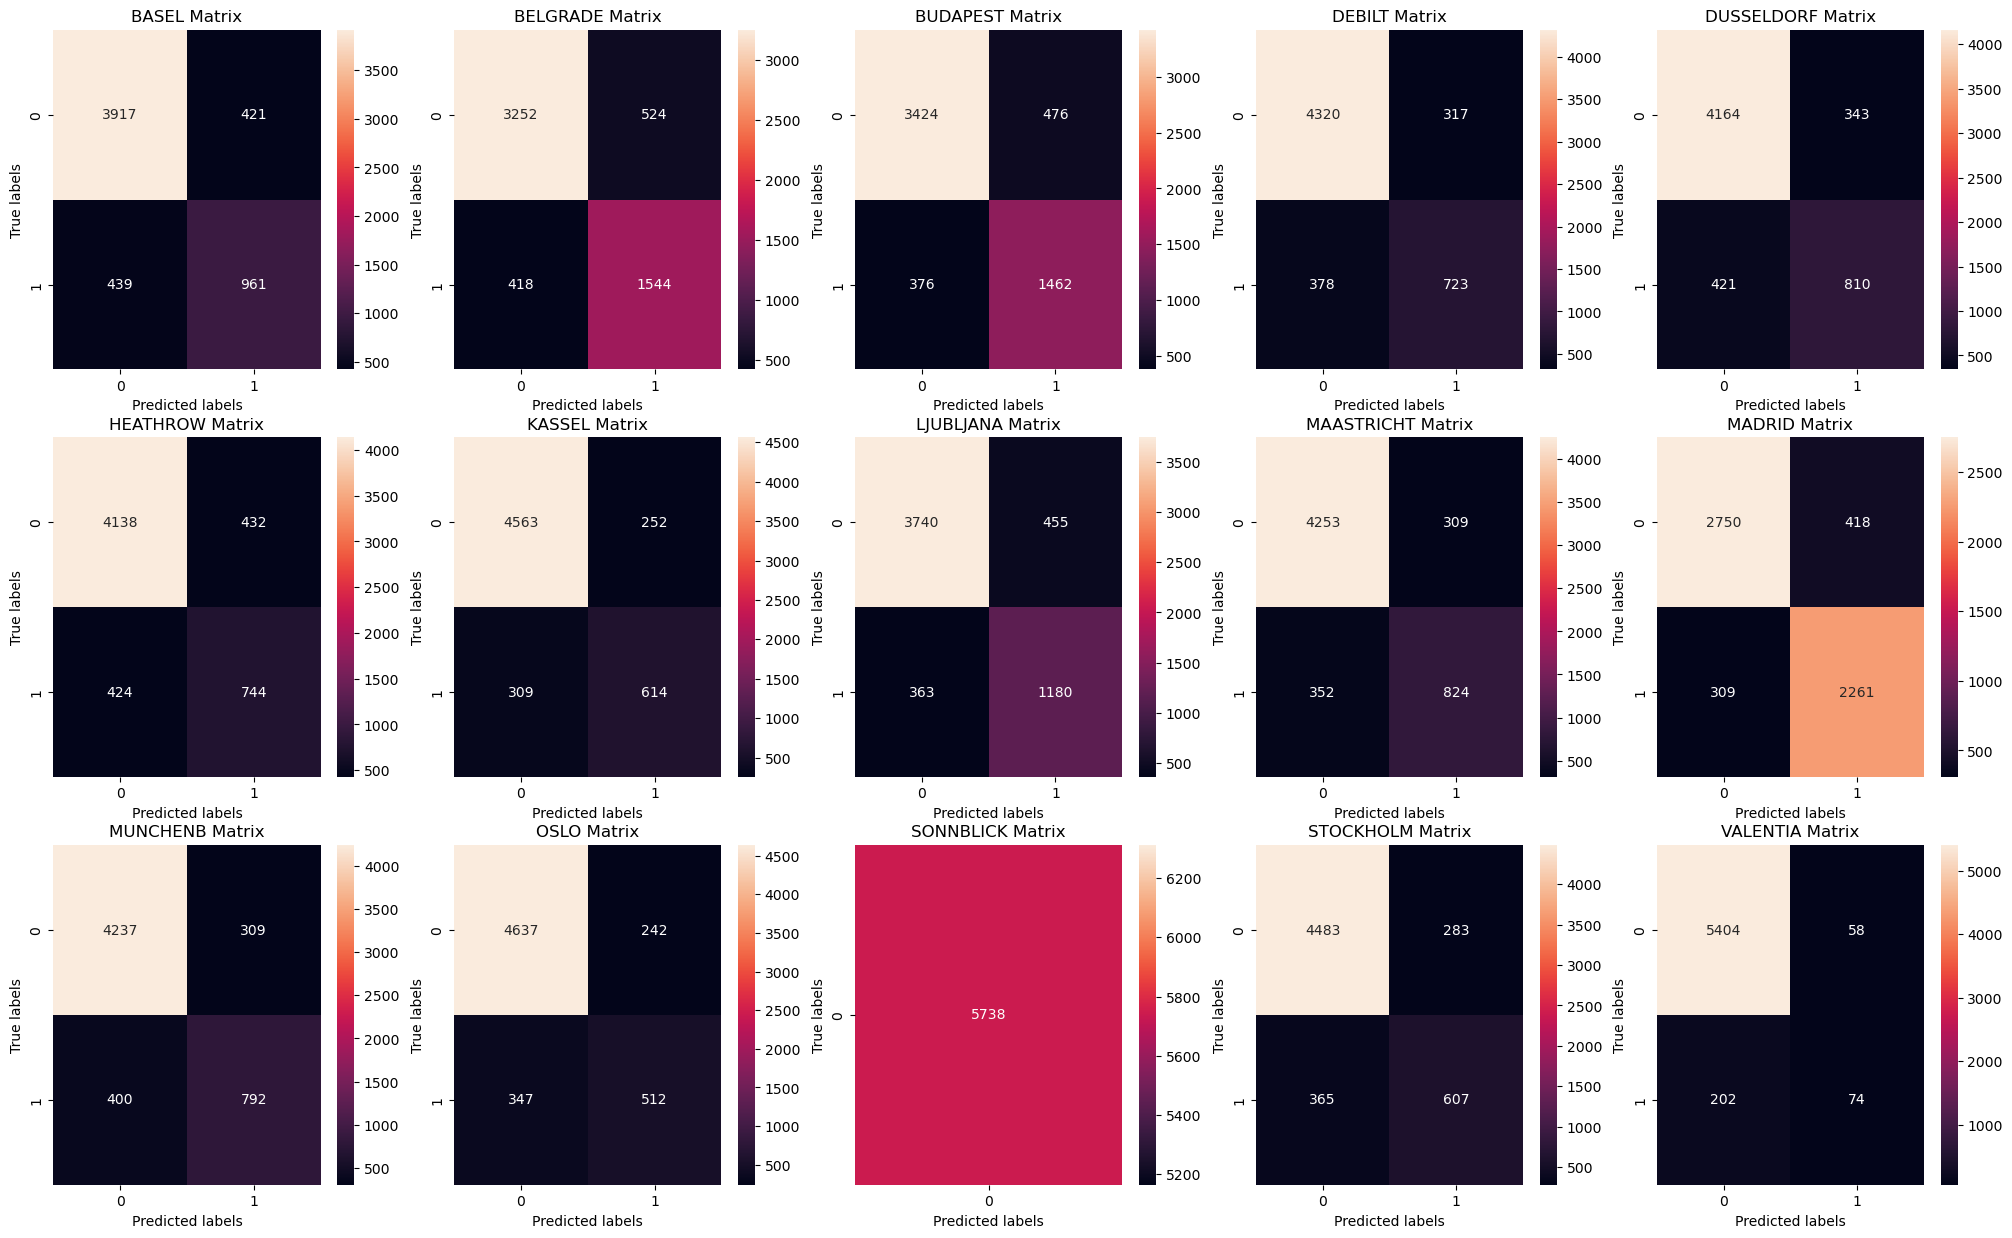

In [38]:
locations = list({x.split("_")[0] for x in unscaled_temps.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
    figure.savefig(os.path.join(path, 'Supervised', 'unscaled_confusion_matrices.png'))

# Splitting Scaled Data into Test/Train.

In [39]:
X = scaled_temps.drop(['DATE','MONTH'], axis = 1)
y = pl_weather.drop(['DATE'], axis = 1)

print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
print(X_train.shape)
print(X_test.shape)

(17212, 45)
(5738, 45)


In [42]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Testing Scaled Data.

In [43]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

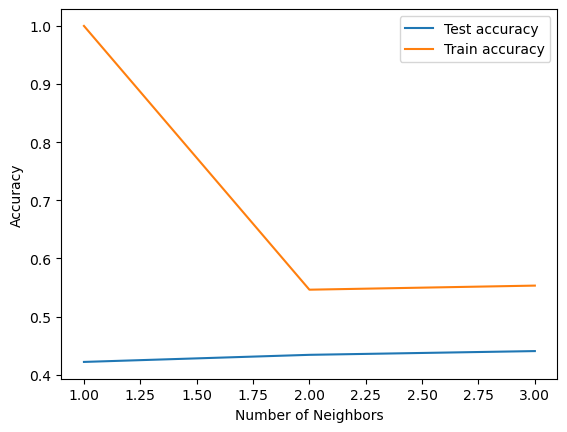

In [44]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


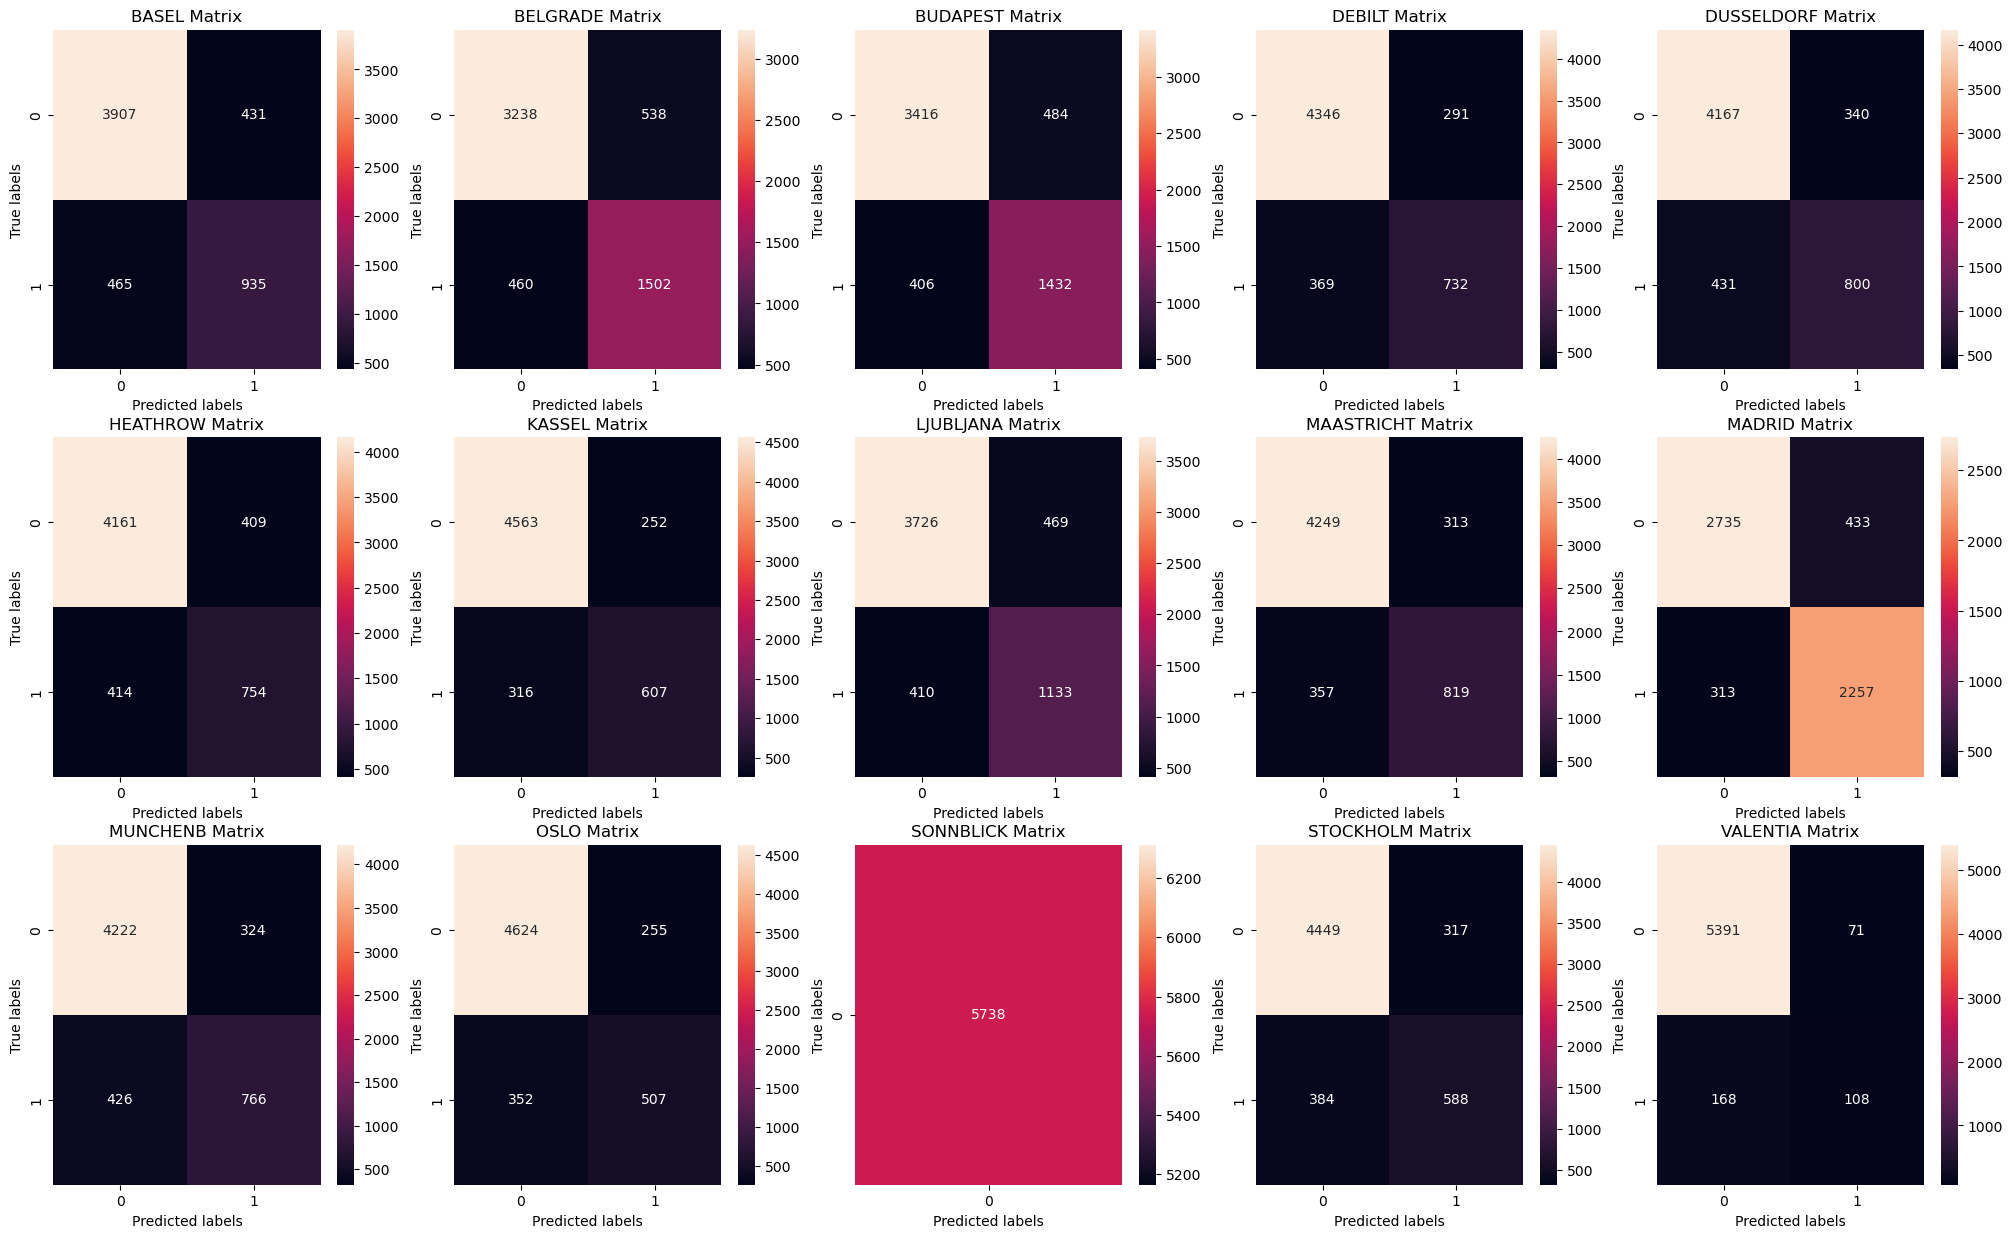

In [45]:
locations = list({x.split("_")[0] for x in unscaled_temps.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
    figure.savefig(os.path.join(path, 'Supervised', 'scaled_confusion_matrices.png'))